In [1]:
import sys
sys.path.append('..')
import numpy as np
from util.layers import MatMul
from util.tools import *
from model.simple_CBOW import SimpleCBOW
from util.trainer import Trainer
from util.optimizer import Adam
import matplotlib.pyplot as plt

------------------------------------------------------------
                       GPU Mode (cupy)
------------------------------------------------------------



In [2]:
c = np.array([[1,0,0,0,0,0,0]])
W = np.random.randn(7,3)

Fully Connected Layer

In [3]:
h = np.matmul(c,W)
print(h)

[[ 0.35288027 -1.24601732 -0.20546003]]


MalMul layer

In [4]:
layer = MatMul(W)
hM = layer.forward(c)
print(hM)

[[ 0.35288027 -1.24601732 -0.20546003]]


CBOW with MatMul

In [5]:
c0 = np.array([[1,0,0,0,0,0,0]])
c1 = np.array([[0,0,1,0,0,0,0]])

In [6]:
W_in = np.random.randn(7,3)
W_out = np.random.randn(3,7)

In [7]:
in_layer0 = MatMul(W_in)
in_layer1 = MatMul(W_in)
out_layer = MatMul(W_out)

In [8]:
h0 = in_layer0.forward(c0)
h1 = in_layer1.forward(c1)
h = 0.5 * (h0+h1)
s = out_layer.forward(h)
s

array([[ 0.55333659, -0.14614198,  0.24786934, -0.95962313,  0.17326406,
        -0.23854647,  0.33290667]])

CBOW with real text

In [9]:
text = 'I am Tung and I was UETer.'

In [10]:
corpus, word_to_id, id_to_word = preprocess(text)
corpus

array([0, 1, 2, 3, 0, 4, 5, 6])

In [11]:
id_to_word

{0: 'i', 1: 'am', 2: 'tung', 3: 'and', 4: 'was', 5: 'ueter', 6: '.'}

In [12]:
contexts,target = create_contexts_target(corpus, window_size=1)
contexts

array([[0, 2],
       [1, 3],
       [2, 0],
       [3, 4],
       [0, 5],
       [4, 6]])

In [13]:
target

array([1, 2, 3, 0, 4, 5])

In [14]:
vocab_size = len(word_to_id)
target = convert_one_hot(target,vocab_size)
contexts = convert_one_hot(contexts,vocab_size)

Main Training

In [15]:
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 100

In [16]:
model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model,optimizer)

| epoch 1 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 2 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 3 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 4 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 5 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 6 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 7 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 8 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 9 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 10 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 11 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 12 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 13 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 14 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 15 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 16 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 17 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 18 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 19 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 20 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 21 |  iter 1 / 2 | ti

| epoch 63 |  iter 1 / 2 | time 0[s] | loss 1.86
| epoch 64 |  iter 1 / 2 | time 0[s] | loss 1.88
| epoch 65 |  iter 1 / 2 | time 0[s] | loss 1.87
| epoch 66 |  iter 1 / 2 | time 0[s] | loss 1.85
| epoch 67 |  iter 1 / 2 | time 0[s] | loss 1.86
| epoch 68 |  iter 1 / 2 | time 0[s] | loss 1.86
| epoch 69 |  iter 1 / 2 | time 0[s] | loss 1.86
| epoch 70 |  iter 1 / 2 | time 0[s] | loss 1.85
| epoch 71 |  iter 1 / 2 | time 0[s] | loss 1.84
| epoch 72 |  iter 1 / 2 | time 0[s] | loss 1.84
| epoch 73 |  iter 1 / 2 | time 0[s] | loss 1.84
| epoch 74 |  iter 1 / 2 | time 0[s] | loss 1.85
| epoch 75 |  iter 1 / 2 | time 0[s] | loss 1.82
| epoch 76 |  iter 1 / 2 | time 0[s] | loss 1.84
| epoch 77 |  iter 1 / 2 | time 0[s] | loss 1.84
| epoch 78 |  iter 1 / 2 | time 0[s] | loss 1.82
| epoch 79 |  iter 1 / 2 | time 0[s] | loss 1.82
| epoch 80 |  iter 1 / 2 | time 0[s] | loss 1.81
| epoch 81 |  iter 1 / 2 | time 0[s] | loss 1.81
| epoch 82 |  iter 1 / 2 | time 0[s] | loss 1.81
| epoch 83 |  iter 1

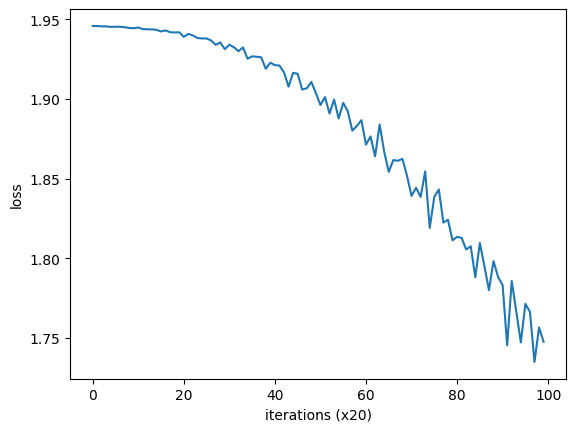

In [17]:
trainer.fit(contexts, target,max_epoch,batch_size)
trainer.plot()

In [18]:
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

i [-0.26670715  0.25921863  0.2828617   0.2804646  -0.17639576]
am [ 0.19909744 -0.1966328  -0.19842605 -0.21623304 -0.22415164]
tung [-0.2377425   0.23533206  0.22893828  0.24722455 -0.25411233]
and [ 0.24419555 -0.25425044 -0.23066652 -0.06814615 -0.03972277]
was [ 0.23403443 -0.25358027 -0.24226274 -0.06037685  0.25204304]
ueter [-0.2035876   0.10977025  0.21311337  0.19000816  0.21157406]
. [ 0.20893565 -0.19675474 -0.20392376 -0.21742663  0.1751708 ]
